<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L2_Metrics_for_UQ_and_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to decision-making under uncertainty (with Python)**

*  Understand uncertainty
*  Modellings approaches
*  Metrics for uncertainty quantification and decision-making





### **Uncertainty sources:**

**Aleatoric uncertainty**: Intrinsic variability, randomness, stochasticity.  
**Epistemic uncertainty**: Lack of data, missing information, model-form uncertainty, imprecision, conflicting evidence, ambiguities




### **Interpretation and modelling approaches:**


**Aleatoric uncertainty**: Irreducible (Natural variability, more data and information can improve the characterization but do not help reducing it.)

- Chance / probability of occurance

1.   Uni-variate: parametric,non-param PDF, CDF, conditional;
2.   Multi-variate: joint PDF, CDF, correlation, depenency
3.   Application to Sochastic programming  

⏩ Probability theory....
Example: $\mathbb{P}(x)$, $ \forall x ∈ X$  


**Epistemic uncertainty**: Reducible (more data, higher-quality data, better models, more knowledgable experts)

- Reasoning on quality of available information

1.   Define the domain of uncertain factors and models
2.   Stochsticity may not be involved, e.g., constant but imprecise material properties
3.   Besides data, physics, prior expert knowledge may help reducing it too
4.   Applies in naturally to robust optimization

⏩ Set theory
Example: define an uncertainty set $x ∈ X$



**Epistemic + Aletory uncertainty**:
Probability models interpretation:

- Reasoning about the uncertainty affecting chances and probabilities

1.   Most of existing real-life problems
2.   Set of parametric distribution,e.g., imprecise mean and variance;
3.   Set of non-parametric distribution, e.g., set of plausible CDFs/PDFs;  


⏩ Statistical reasoning and information theory, Bayesian inference, Evidence theory, Fuzzy set theory, Imprecise probability theory, Belief models, Hyerarchical Bayesian Models.....evolving literature...


Example-1, imprecise prametric: $\mathbb{P}(x) \in \{ \mathbb{P}(x; \theta): \theta ∈ \Theta \} $  

Example-2, imprecise non-parametric: $\mathbb{P}(x) \in [\underline{\mathbb{P}}(x), \overline{\mathbb{P}}(x)]   $  

Example-3, multiple probability assignments : $\mathbb{P}(x) \in \{\mathbb{P}_1(x), x ∈ X_1, \mathbb{P}_2(x), x ∈ X_2 \}$  




**Target Distribution:**



*   $𝑓(𝑥)$, the true (or reference) probability density function.
*   $F(𝑥) = \int\limits_{-∞}^{+∞} f(x) dx$, the corresponding probability distribution function.

**Proposal Distribution:**
, the approximating or proposed probability density function.

*   $\hat{f}(𝑥)$, the proposed, e.g., modelled, probability density function.
*   $\hat{f}(𝑥) = \int\limits_{-∞}^{+∞} \hat{f}(𝑥) dx$, the corresponding probability distribution function.


In [21]:
import sys
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad  # For Wasserstein distance


***Metrics for robust optimization:***

*Uncertainty sets:*


The **Hausdorff distance** distance quantifies how far two subsets A and B of a metric space are from each other. It considers the maximum of the shortest distances from any point in one set to the other set.

$d_H(A, B) = \max\left(\sup\limits_{a \in A} \inf\limits_{b \in B} d(a,b), \sup\limits_{b \in B} \inf\limits_{a \in A} d(a,b)\right)$

The **Jaccard distance** measures the dissimilarity between two sets by calculating the complement of their intersection over their union.
$d_J(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|}$





Chebyshev Distance

In [97]:
from scipy.spatial.distance import directed_hausdorff  # For Hausdorff distance

# Function to compute Hausdorff Distance between a set of points and a boundary
def hausdorff_distance(set_a, set_b):
    # Directed Hausdorff distance (from set_a to set_b, and vice versa)
    return max(directed_hausdorff(set_a, set_b)[0], directed_hausdorff(set_b, set_a)[0])

# Jaccard Distance
def jaccard_distance(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return 1 - intersection / union



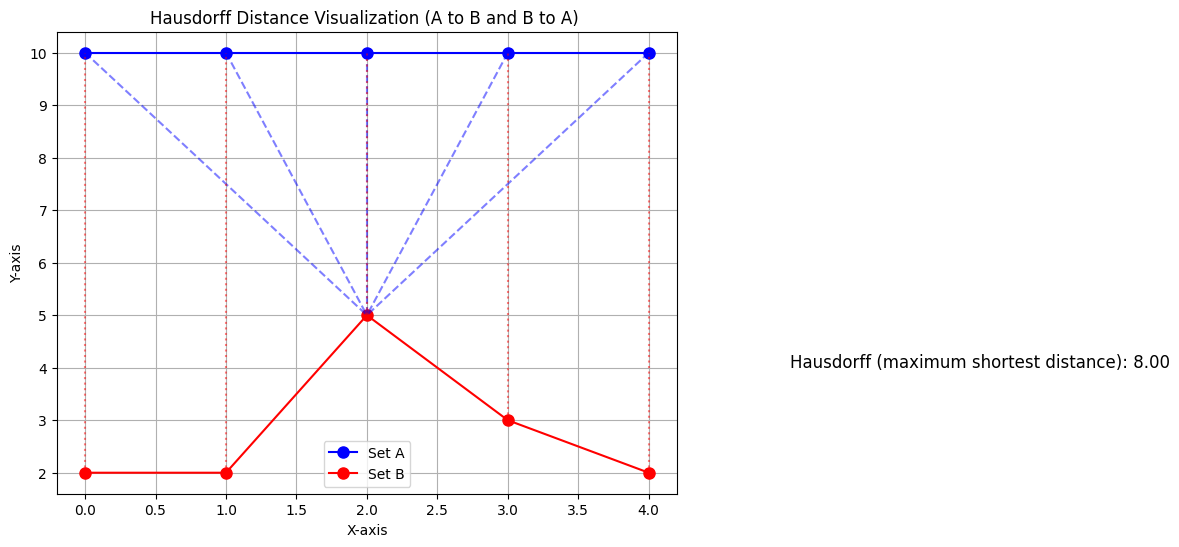

In [100]:

# Define two 2D sets (curves or point sets)
set_a = np.array([[0, 10], [1, 10], [2, 10], [3, 10], [4, 10]])  # Set A
set_b = np.array([[0, 2], [1, 2], [2, 5], [3, 3], [4, 2]])  # Set B

# Hausdorff distance calculation
hausdorff_dist = max(directed_hausdorff(set_a, set_b)[0], directed_hausdorff(set_b, set_a)[0])

# Plot the sets
plt.figure(figsize=(8, 6))

# Plot Set A and Set B
plt.plot(set_a[:, 0], set_a[:, 1], 'bo-', label="Set A", markersize=8)
plt.plot(set_b[:, 0], set_b[:, 1], 'ro-', label="Set B", markersize=8)

# Mark the Hausdorff distance
for i in range(len(set_a)):
    closest_b = np.argmin(np.linalg.norm(set_b - set_a[i], axis=1))
    plt.plot([set_a[i, 0], set_b[closest_b, 0]], [set_a[i, 1], set_b[closest_b, 1]], 'b--', alpha=0.5)

for i in range(len(set_b)):
    closest_a = np.argmin(np.linalg.norm(set_a - set_b[i], axis=1))
    plt.plot([set_b[i, 0], set_a[closest_a, 0]], [set_b[i, 1], set_a[closest_a, 1]], 'r:', alpha=0.5)

# Annotate the Hausdorff Distance
plt.text(5, 4, f"Hausdorff (maximum shortest distance): {hausdorff_dist:.2f}", fontsize=12, color='black')

plt.title("Hausdorff Distance Visualization (A to B and B to A) ")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

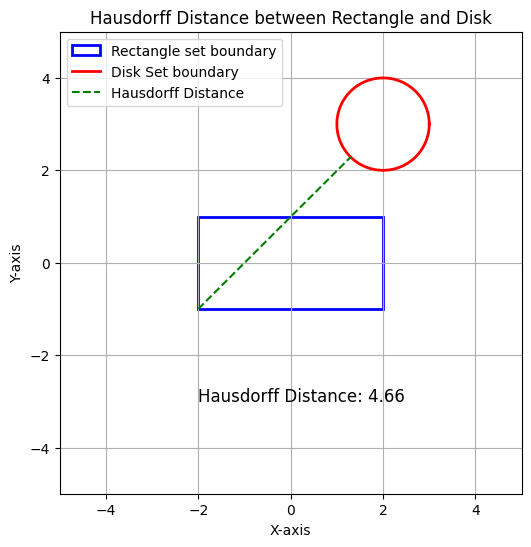

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import directed_hausdorff

# Define a rectangle and a disk
rectangle_corners = np.array([[-2, -1], [2, -1], [2, 1], [-2, 1]])  # A simple rectangle
angle = np.linspace(0, 2 * np.pi, 100)  # Disk angles for the boundary
radius = 1
center = np.array([2, 3])
disk_boundary = np.array([center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle)]).T


# Compute the Hausdorff distance between the rectangle and the disk boundary
hdist = hausdorff_distance(rectangle_corners, disk_boundary)

# Plot the rectangle and disk
plt.figure(figsize=(8, 6))

# Plot rectangle (closed polygon)
rectangle = plt.Polygon(rectangle_corners, closed=True, fill=None, edgecolor='blue', linewidth=2, label='Rectangle set boundary')
plt.gca().add_patch(rectangle)

# Plot disk boundary
plt.plot(disk_boundary[:, 0], disk_boundary[:, 1], 'r-', label='Disk Set boundary', linewidth=2)

# Mark the Hausdorff distance (Example: Max distance between rectangle and disk boundary)
# Here we just highlight the closest points for simplicity
closest_points_rectangle_to_disk = [rectangle_corners[0], disk_boundary[np.argmin(np.linalg.norm(disk_boundary - rectangle_corners[0], axis=1))]]
plt.plot([closest_points_rectangle_to_disk[0][0], closest_points_rectangle_to_disk[1][0]],
         [closest_points_rectangle_to_disk[0][1], closest_points_rectangle_to_disk[1][1]], 'g--', label='Hausdorff Distance')

# Annotate Hausdorff distance
plt.text(-2, -3, f"Hausdorff Distance: {hdist:.2f}", fontsize=12, color='black')

# Adjust plot settings
plt.title("Hausdorff Distance between Rectangle and Disk")
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

# Metrics for stochastic optimization:

*PDF/CDF:*

$f(x) = \frac{d}{dx} F(x)$

$F(x) = \int_{-\infty}^x f(t) \, dt$

Mean:  

$\mu = \mathbb{E}[X] = \int_{-\infty}^\infty x f(x) \, dx$

Variance:

$\mathbb{E}[(X-\mu)^2] = \int_{-\infty}^\infty (x-\mu)^2 f(x) \, dx$

Skewness:  

$ S = \int_{-\infty}^\infty x f(x) \, dx$

Kurtosis:

$K = \int_{-\infty}^\infty x^2 f(x) \, dx$


N-th raw moment:

$\mu_n = \mathbb{E}[X^n] = \int_{-\infty}^\infty (x-c)^n f(x) \, dx$

- Value-at-risk and percentile

$\text{VaR}_{\alpha} = F^{-1}(\alpha) = \inf \{ x : F(x) \geq \alpha \}$


- Tails expectations, Conditional Value-at-Risk

$\text{CVaR}_{\alpha} = \mathbb{E}[X \, | \, X \geq \text{VaR}_{\alpha}]$


In [138]:
# Define 1D Gaussian density function
from scipy.stats import norm

class Gaussian:
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma

  def pdf(self, x):
      return (1 / (self.sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self.mu) / self.sigma) ** 2)

  def cdf(self, x):
      return 0.5 * (1 + np.vectorize(math.erf)((x - self.mu) / (self.sigma * np.sqrt(2))))

  def icdf(self, alpha):
      return norm.ppf(alpha, loc=self.mu, scale=self.sigma)

  def value_at_risk(self, alpha):
        """Value-at-risk at level alpha = inverse_cdf(alpha)"""
        return self.icdf(alpha)  # VaR is the inverse CDF at level alpha

  def conditional_value_at_risk(self, alpha):
      # Calculate the Value-at-Risk at level alpha
      # closed form expression (Gaussian = mu + sigma/(1-alpha)*pdf(icdf(alpha)))
      pdf_at_var = norm.pdf(self.value_at_risk(alpha))
      cvar_alpha = self.mu + (pdf_at_var / (1 - alpha)) * self.sigma
      return cvar_alpha

  def sample(self, n_samples):
      # sample uniformly alpha in [0,1] -> inverse CDF
      alpha_vals = np.random.uniform(0, 1, n_samples)
      return self.icdf(alpha_vals)


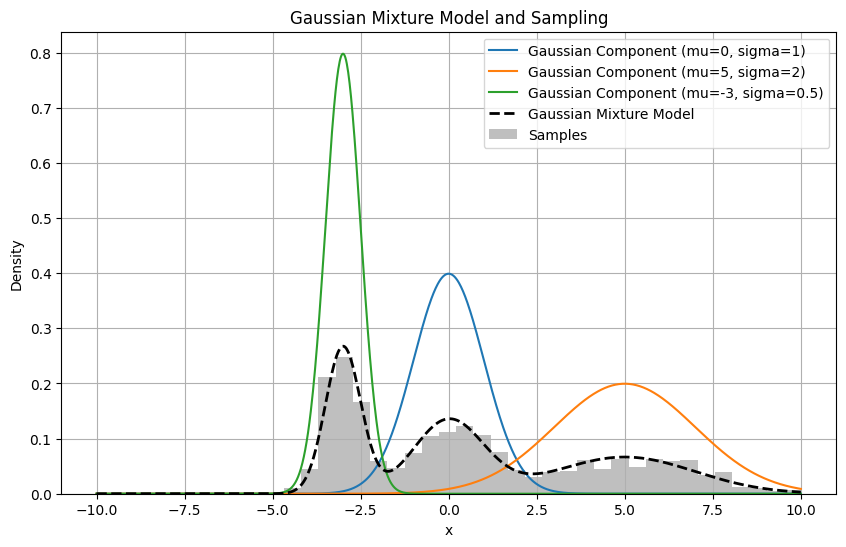

In [139]:
# Define a Gaussian Mixture Model (GMM)
class GaussianMixtureModel:
    """Mixture of Gaussians"""

    def __init__(self, components, weights):
        self.components = components  # List of Gaussian components
        self.weights = weights  # List of weights for each component

    def pdf(self, x):
        result = np.zeros_like(x)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.pdf(x)
        return result

    def cdf(self, x):
        result = np.zeros_like(x)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.cdf(x)
        return result

    def icdf(self, alpha, tol=1e-6, max_iter=100):
        low, high = -1e6, 1e6  # Assume an appropriate range for ICDF
        result = []

        for a in np.atleast_1d(alpha):  # Allow alpha to be a scalar or array
            # Binary search for each alpha
            for _ in range(max_iter):
                mid = (low + high) / 2
                if np.abs(self.cdf(mid) - a) < tol:
                    result.append(mid)
                    break
                elif self.cdf(mid) < a:
                    low = mid
                else:
                    high = mid
            else:
                raise ValueError("Inverse CDF did not converge.")
        return np.array(result) if len(result) > 1 else result[0]

    def sample(self, n_samples):
        samples = []
        for _ in range(n_samples):
            # Choose a component based on the weights
            component = np.random.choice(self.components, p=self.weights)
            sample = component.sample(1)  # Sample 1 value from the chosen component
            samples.append(sample[0])
        return np.array(samples)

# Define Gaussian components
gaussian1 = Gaussian(mu=0, sigma=1)
gaussian2 = Gaussian(mu=5, sigma=2)
gaussian3 = Gaussian(mu=-3, sigma=0.5)

# Define weights for the mixture
weights = [1/3, 1/3, 1/3]  # Sum to 1

# Create GMM
GMM3 = GaussianMixtureModel(components=[gaussian1, gaussian2, gaussian3], weights=weights)

# Sample data from the GMM
n_samples = 1000
samples = GMM3.sample(n_samples)

# Define x values for plotting the PDF
x = np.linspace(-10, 10, 1000)

# Plot individual Gaussian PDFs and the GMM PDF
plt.figure(figsize=(10, 6))

# Plot each Gaussian component
for component, weight in zip(GMM3.components, GMM3.weights):
    plt.plot(x, component.pdf(x), label=f'Gaussian Component (mu={component.mu}, sigma={component.sigma})')

# Plot the overall GMM PDF
plt.plot(x, GMM3.pdf(x), label='Gaussian Mixture Model', linewidth=2, color='black', linestyle='--')

# Plot sampled data points
plt.hist(samples, bins=30, density=True, alpha=0.5, color='gray', label='Samples')

plt.title('Gaussian Mixture Model and Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

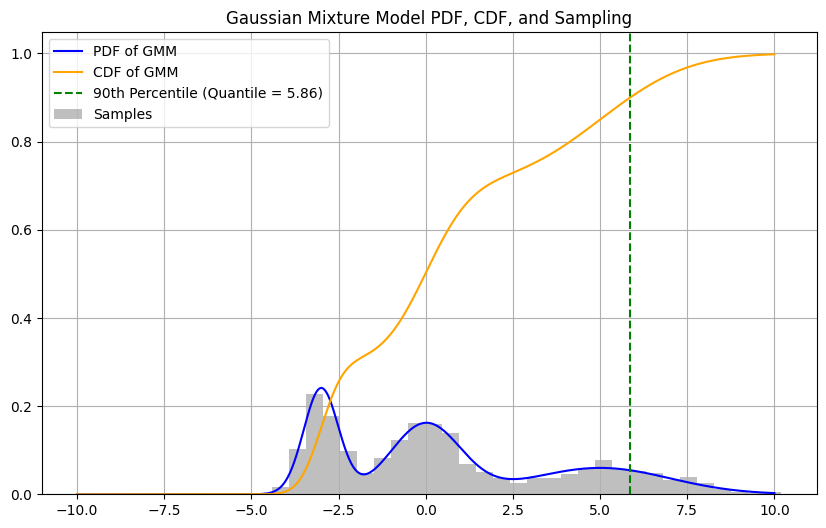

In [140]:
# Define Gaussian components
gaussian1 = Gaussian(mu=0, sigma=1)
gaussian2 = Gaussian(mu=5, sigma=2)
gaussian3 = Gaussian(mu=-3, sigma=0.5)

# Define weights for the mixture
weights = [0.4, 0.3, 0.3]  # Sum of weights should be 1

# Create GMM
gmm = GaussianMixtureModel(components=[gaussian1, gaussian2, gaussian3], weights=weights)

# Evaluate PDF at some points
x = np.linspace(-10, 10, 1000)
pdf_values = gmm.pdf(x)

# Evaluate CDF at some points
cdf_values = gmm.cdf(x)

# Compute inverse CDF for a probability level
quantile_90 = gmm.icdf(0.9)

# Sample from the GMM
samples = gmm.sample(1000)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label="PDF of GMM", color="blue")
plt.plot(x, cdf_values, label="CDF of GMM", color="orange")
plt.axvline(quantile_90, color="green", linestyle="--", label=f"90th Percentile (Quantile = {quantile_90:.2f})")
plt.hist(samples, bins=30, density=True, alpha=0.5, color='gray', label='Samples')
plt.legend()
plt.title("Gaussian Mixture Model PDF, CDF, and Sampling")
plt.grid()
plt.show()


# *Distance and divergence:*   (Target and Proposal)






- Kolmogorov-Smirnov (KS) distance

$d_{KS}(F, \hat{F}) = \sup_x |F(x) - \hat{F}(x)|$


In [169]:
# Kolmogorov-Smirnov Distance
def kolmogorov_smirnov_distance(cdf_vals_target, cdf_vals_proposal):
    ks_distance = np.max(np.abs(cdf_vals_target - cdf_vals_proposal))
    ks_index = np.argmax(np.abs(cdf_target - cdf_proposal))
    return ks_distance, ks_index

In [170]:
 # This is our target (THIS IS GENERALLY UNKNOWN, e.g., ESTIMATED EMPIRICALLY FROM DATA)
cdf_target = GMM3.cdf(x)

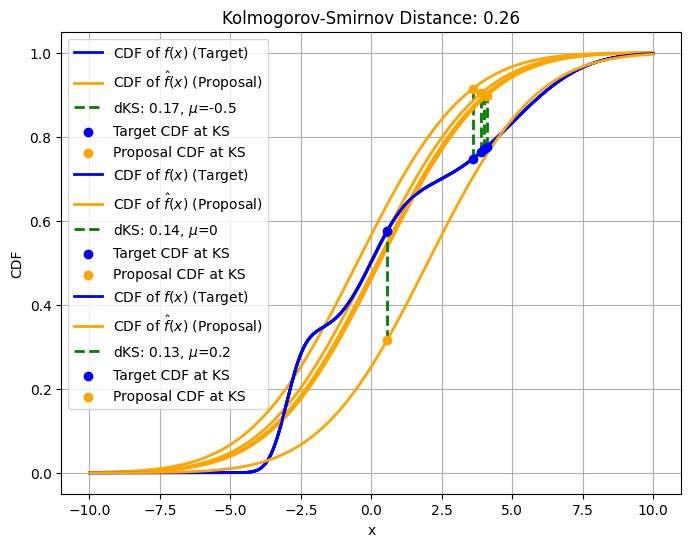

In [171]:
# Plot CDFs and highlight the maximum distance
plt.figure(figsize=(8, 6))

x = np.linspace(-10, 10, 1000)

proposed_mean_vals = [-0.5, 0, 0.2, 0.3, 2]
for proposed_mean in proposed_mean_vals:
    cdf_proposal = Gaussian(mu=proposed_mean, sigma=3).cdf(x)

    # Calculate the Kolmogorov-Smirnov Distance
    ks_distance, ks_index = kolmogorov_smirnov_distance(cdf_target, cdf_proposal)

    # Get the point of maximum distance
    x_ks = x[ks_index]
    y_target = cdf_target[ks_index]
    y_proposal = cdf_proposal[ks_index]


    plt.plot(x, cdf_target, label=r"CDF of $f(x)$ (Target)", color="blue", linewidth=2)
    plt.plot(x, cdf_proposal, label=r"CDF of $\hat{f}(x)$ (Proposal)", color="orange", linewidth=2)

    # Highlight the KS distance
    plt.vlines(
        x=x_ks,
        ymin=min(y_target, y_proposal),
        ymax=max(y_target, y_proposal),
        colors="green",
        linestyle="--",
        label=f"dKS: {ks_distance:.2f}, $\mu$={proposed_mean}",
        linewidth=2
    )
    plt.scatter([x_ks], [y_target], color="blue", zorder=5, label="Target CDF at KS")
    plt.scatter([x_ks], [y_proposal], color="orange", zorder=5, label="Proposal CDF at KS")
    if proposed_mean==proposed_mean_vals[2]:
      plt.legend()

# Add titles, labels, and legend
plt.title(f"Kolmogorov-Smirnov Distance: {ks_distance:.2f}")
plt.xlabel("x")
plt.ylabel("CDF")

plt.grid()
plt.show()

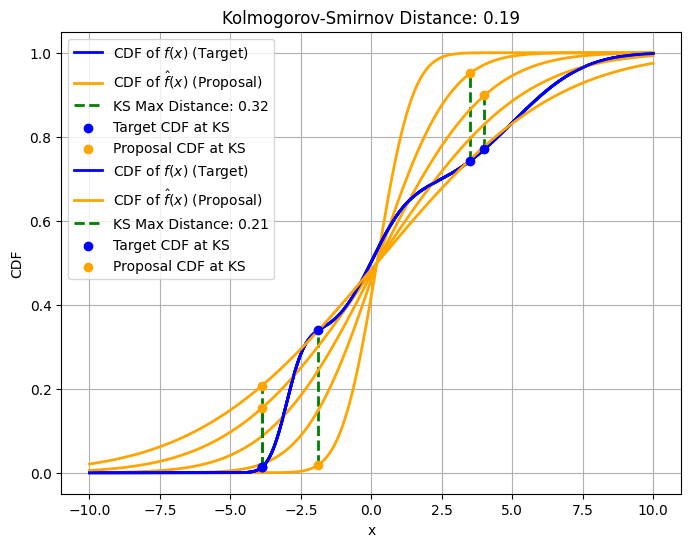

In [172]:
# Plot CDFs and highlight the maximum distance
plt.figure(figsize=(8, 6))
proposed_sigma_vals = [1, 2, 3, 4, 5]
for proposed_param in proposed_sigma_vals:
    cdf_proposal = Gaussian(0.2, proposed_param).cdf(x)

    # Calculate the Kolmogorov-Smirnov Distance
    ks_distance, ks_index = kolmogorov_smirnov_distance(cdf_target, cdf_proposal)

    # Get the point of maximum distance
    x_ks = x[ks_index]
    y_target = cdf_target[ks_index]
    y_proposal = cdf_proposal[ks_index]


    plt.plot(x, cdf_target, label=r"CDF of $f(x)$ (Target)", color="blue", linewidth=2)
    plt.plot(x, cdf_proposal, label=r"CDF of $\hat{f}(x)$ (Proposal)", color="orange", linewidth=2)

    # Highlight the KS distance
    plt.vlines(
        x=x_ks,
        ymin=min(y_target, y_proposal),
        ymax=max(y_target, y_proposal),
        colors="green",
        linestyle="--",
        label=f"KS Max Distance: {ks_distance:.2f}",
        linewidth=2
    )
    plt.scatter([x_ks], [y_target], color="blue", zorder=5, label="Target CDF at KS")
    plt.scatter([x_ks], [y_proposal], color="orange", zorder=5, label="Proposal CDF at KS")
    if proposed_param==proposed_sigma_vals[1]:
      plt.legend()

# Add titles, labels, and legend
plt.title(f"Kolmogorov-Smirnov Distance: {ks_distance:.2f}")
plt.xlabel("x")
plt.ylabel("CDF")

plt.grid()
plt.show()



- Kullback-Leibler

$D_{KL}(f \| \hat{f}) = \int f(x) \log \frac{f(x)}{\hat{f}(x)} \, dx$



In [209]:
from scipy.stats import entropy  # For KL divergence
from scipy.special import kl_div

 # This is our target (THIS IS GENERALLY UNKNOWN, e.g., ESTIMATED EMPIRICALLY FROM DATA)
pdf_target = lambda x: GMM3.pdf(x)
pdf_proposal = lambda x: Gaussian(2, 3).pdf(x)

# Kullback-Leibler Divergence
def kl_divergence(p, q, x):
    #  return - p(x)*np.log(p(x)/q(x))
    return entropy(p(x), q(x))


- Bhattacharyya Distance

$D_B(f, \hat{f}) = -\log \int \sqrt{f(x) \hat{f}(x)} \, dx$



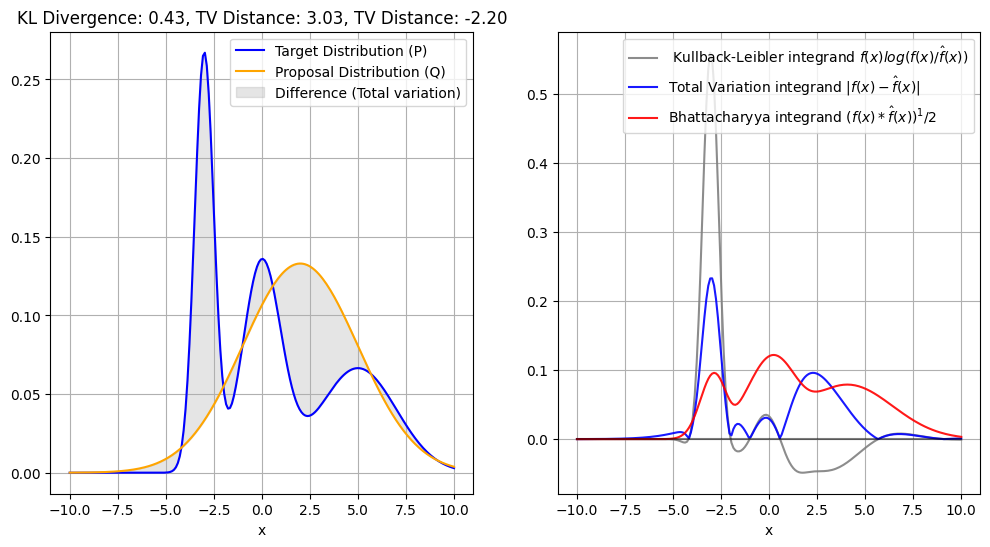

In [213]:
# Total Variation Distance
def total_variation(p, q, x):
    return 0.5 * np.sum(np.abs(p(x) - q(x)))

# Bhattacharyya Distance
def battacharya_distance(f, f_hat, x):
    term1 = np.sum(np.sqrt(f(x) * f_hat(x)))
    return -np.log(term1)

# Compute KL divergence
x = np.linspace(-10, 10, 200)
d_kl = kl_divergence(pdf_target, pdf_proposal, x)
d_tv = total_variation(pdf_target, pdf_proposal, x)
d_bt= battacharya_distance(pdf_target, pdf_proposal, x)


fig, ax = plt.subplots(1,2,figsize=(12, 6))

# Plot the two distributions
ax[0].plot(x, pdf_target(x), label="Target Distribution (P)", color="blue")
ax[0].plot(x, pdf_proposal(x), label="Proposal Distribution (Q)", color="orange")
ax[0].set_title(f"KL Divergence: {d_kl:.2f}, TV Distance: {d_tv:.2f}, TV Distance: {d_bt:.2f}")

ax[0].fill_between(x, pdf_target(x), pdf_proposal(x), color="gray", alpha=0.2, label="Difference (Total variation)")
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('x')


ax[1].plot(x, pdf_target(x)* (np.log(pdf_target(x)) - np.log(pdf_proposal(x))), color="gray", alpha=0.9, label=" Kullback-Leibler integrand $f(x)log(f(x)/\hat{f}(x))$")
ax[1].plot(x, np.abs(pdf_target(x) - pdf_proposal(x)), color="blue", alpha=0.9, label="Total Variation integrand $|f(x) - \hat{f}(x)|$")
ax[1].plot(x, np.sqrt(pdf_target(x) * pdf_proposal(x)), color="red", alpha=0.9, label="Bhattacharyya integrand $(f(x) * \hat{f}(x))^1/2$")
ax[1].plot(x, np.zeros(shape=np.shape(x)), color="k", alpha=0.5)
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('x')
plt.show()

- Wasserstein distance (also known as Kantorovich-Rubinstein distance)

Be $\mu ,\nu \in \mathbb{P}(\mathbb{R})$ probability measures
  
${\displaystyle Cost =\inf _{\gamma \in \Gamma (\mu ,\nu )}\int c(x,y)\,\mathrm {d} \gamma (x,y).}$

1-Dimensional distribution


$p$-Wasserstei:  ${\displaystyle W_{p}(\mu _{1},\mu _{2})=\left(\int _{0}^{1}\left|F_{1}^{-1}(q)-F_{2}^{-1}(q)\right|^{p}\,\mathrm {d} q\right)^{1/p},}$


$1$-Wasserstei:
${\displaystyle W_{1}(\mu _{1},\mu _{2})=\int _{\mathbb {R} }\left|F(x)-\hat{F}(x)\right|\,\mathrm {d} x.}$

Example two gaussian

$\displaystyle W_{2}(\mu _{1},\mu _{2})^{2}=\|m_{1}-m_{2}\|_{2}^{2}+\mathop {\mathrm {trace} } {\bigl (}C_{1}+C_{2}-2{\bigl (}C_{2}^{1/2}C_{1}C_{2}^{1/2}{\bigr )}^{1/2}{\bigr )}$


In [216]:
# Wasserstein Distance (1D)
def wasserstein_distance(p, q, x):
    cdf_p = np.cumsum(p(x)) / np.sum(p(x))
    cdf_q = np.cumsum(q(x)) / np.sum(q(x))
    return np.sum(np.abs(cdf_p - cdf_q) * (x[1] - x[0]))





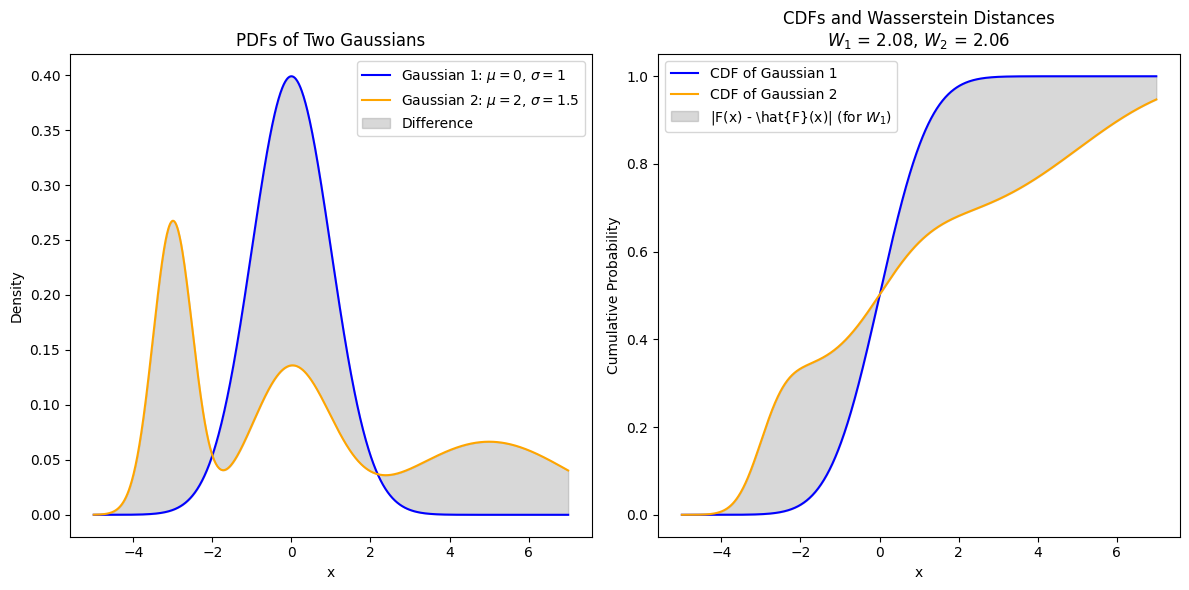

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def wasserstein_distance_1d(F1, F2, x, p=1):
    """Compute the p-Wasserstein distance between two 1D CDFs."""
    if p == 1:
        # W1: Integral of the absolute difference between two CDFs
        return np.trapz(np.abs(F1 - F2), x)
    else:
        # Wp: Integral of |F1^(-1)(q) - F2^(-1)(q)|^p, requires inverse CDF
        q = np.linspace(0, 1, len(x))
        F1_inv = norm.ppf(q, loc=mu1, scale=sigma1)
        F2_inv = norm.ppf(q, loc=mu2, scale=sigma2)
        return (np.trapz(np.abs(F1_inv - F2_inv) ** p, q)) ** (1 / p)

# Define two Gaussian distributions
mu1, sigma1 = 0, 1  # Mean and standard deviation of the first Gaussian
mu2, sigma2 = 2, 1.5  # Mean and standard deviation of the second Gaussian

W2 = np.sqrt((mu1 - mu2) ** 2 + (sigma1 ** 2 + sigma2 ** 2 - 2 * np.sqrt(sigma1 ** 2 * sigma2 ** 2)))

# Generate a range of x values
x = np.linspace(-5, 7, 1000)

# Compute the PDFs and CDFs
pdf1 = norm.pdf(x, loc=mu1, scale=sigma1)
pdf2 = GMM3.pdf(x)
cdf1 = norm.cdf(x, loc=mu1, scale=sigma1)
cdf2 = GMM3.cdf(x)

# Compute Wasserstein distances
W1 = wasserstein_distance_1d(cdf1, cdf2, x, p=1)


# Plot PDFs and CDFs
plt.figure(figsize=(12, 6))

# PDF comparison
plt.subplot(1, 2, 1)
plt.plot(x, pdf1, label=f"Gaussian 1: $\mu={mu1}$, $\sigma={sigma1}$", color="blue")
plt.plot(x, pdf2, label=f"Gaussian 2: $\mu={mu2}$, $\sigma={sigma2}$", color="orange")
plt.fill_between(x, pdf1, pdf2, color="gray", alpha=0.3, label="Difference")
plt.title("PDFs of Two Gaussians")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

# CDF comparison
plt.subplot(1, 2, 2)
plt.plot(x, cdf1, label=f"CDF of Gaussian 1", color="blue")
plt.plot(x, cdf2, label=f"CDF of Gaussian 2", color="orange")
plt.fill_between(x, cdf1, cdf2, color="gray", alpha=0.3, label="|F(x) - \hat{F}(x)| (for $W_1$)")
plt.title(f"CDFs and Wasserstein Distances\n$W_1$ = {W1:.2f}, $W_2$ = {W2:.2f}")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()





- Jensen-Shannon (JS) divergence

$D_{JS}(f \| \hat{f}) = \frac{1}{2} D_{KL}\left(f \| m\right) + \frac{1}{2} D_{KL}\left(\hat{f} \| m\right)$

In [214]:
# Shannon Entropy
def shannon_entropy(f, x):
    return -np.sum(f(x) * np.log(f(x) + np.finfo(float).eps))  # Prevent log(0)



In [1]:

import numpy as np
import numpy.random as random
import scipy.stats as stats
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
from scipy.spatial import convex_hull_plot_2d


def plot_disk(center, radius, data_points=None,  ax=None, show=True):
    """
    Plot a 2D disk (circle) with a given center and radius, and optionally the data points.

    Parameters:
    - center (array-like): The center of the disk (x, y).
    - radius (float): The radius of the disk.
    - data_points (array-like, optional): Data points to plot on the same figure.
    """
    if ax is None:
        fig, ax = plt.subplots()

    # Plot the data points
    if data_points is not None:
        ax.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')

    # Create a circle representing the enclosing disk
    circle = plt.Circle(center, radius, color='red', fill=False, linestyle='--', linewidth=2, label='Enclosing Disk')

    ax.add_artist(circle)

    # Set the limits of the plot for better visibility
    ax.set_xlim(center[0] - radius - 1, center[0] + radius + 1)
    ax.set_ylim(center[1] - radius - 1, center[1] + radius + 1)

    # Set equal scaling and labels
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True)

    if show:
        ax.legend()
        ax.set_title("Minimum Enclosing Disk")
        plt.show()



def data_enclosing_ball(points, reject_percentage=0.0):
    """
    Given a set of points in n-dimensional space, computes the smallest enclosing ball.
    Uses a geometric approach to find the ball.
    """
    # For simplicity, we compute the convex hull and then calculate the smallest enclosing ball.
    points = np.array(points)
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]

    # Compute the centroid and maximum distance from the centroid to any point on the hull
    center = np.mean(hull_points, axis=0)
    radius = max(np.linalg.norm(center - point) for point in hull_points)

    if reject_percentage > 0 and reject_percentage < 100:
        n_samples = len(points)
        n_samples_2_keep = int((100 - reject_percentage)/100 * len(points))
        n_samples_discard = n_samples-n_samples_2_keep
        points_inner_hull = points.copy()

        while len(points_inner_hull) >= n_samples_2_keep:

            if len(hull.vertices) > n_samples_discard:
                points_inner_hull = np.delete(points_inner_hull, hull.vertices[:n_samples_discard], axis=0)
            else:
                points_inner_hull = np.delete(points_inner_hull, hull.vertices, axis=0)

            hull = ConvexHull(points_inner_hull)
            hull_points = points[hull.vertices]

        center = np.mean(points_inner_hull, axis=0)
        radius = max(np.linalg.norm(center - point) for point in hull_points)

    elif reject_percentage >= 100:
        print(reject_percentage, "percent of the points are rejected. No enclosing ball can be computed.")
        return None, None, None

    return center, radius, hull


def data_enclosing_non_convex(points, reject_percentage=0.0, nu=0.1, kernel='rbf', gamma='scale'):
    """
    Given a set of points in n-dimensional space, fit a one-class SVM to define hull points (non-convex).
    Optionally remove a percentage of the data for robustness.

    Parameters:
    - points (array-like): An array of shape (n_samples, n_dimensions) representing the data points.
    - reject_percentage (float): Percentage of points to reject (0.0 to 100.0). Defaults to 0.
    - nu (float): An upper bound on the fraction of margin errors in the one-class SVM model.
    - kernel (str): Kernel type to be used in the one-class SVM ('rbf', 'linear', etc.).
    - gamma (str or float): Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.

    Returns:
    - model (OneClassSVM): Trained one-class SVM model.
    - hull_points (array-like): Points identified as the non-convex hull (support vectors).
    """
    points = np.array(points)

    # Train a one-class SVM model
    one_class_model = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
    one_class_model.fit(points)

    # Extract support vectors as hull points
    support_vectors = one_class_model.support_vectors_

    # Optionally reject a percentage of points
    if 0 < reject_percentage < 100:
        n_samples = len(points)
        n_samples_2_keep = int((100 - reject_percentage) / 100 * n_samples)

        # Use ConvexHull on the current support vectors to remove additional points
        remaining_points = support_vectors.copy()
        while len(remaining_points) > n_samples_2_keep:
            hull = ConvexHull(remaining_points)
            points_to_remove = len(remaining_points) - n_samples_2_keep

            if len(hull.vertices) > points_to_remove:
                remaining_points = np.delete(remaining_points, hull.vertices[:points_to_remove], axis=0)
            else:
                remaining_points = np.delete(remaining_points, hull.vertices, axis=0)

        hull_points = remaining_points

    elif reject_percentage >= 100:
        print(f"{reject_percentage}% of the points are rejected. No enclosing ball can be computed.")
        return None, None
    else:
        hull_points = support_vectors

    return one_class_model, hull_points


import numpy as np
from sklearn.datasets import make_blobs, make_moons


def data_generation_mechanism(n_samples: int = 100,
                              n_dimensions: int = 1,
                              type='normal',
                              add_noise: bool = False,
                              nose_level: float = 0.5):
    """
    Generates a matrix of random data with specified number of samples and dimensions.

    Parameters:
    - n_samples (int): Number of samples (rows of the matrix).
    - n_dimensions (int): Number of dimensions (columns of the matrix).
    - type (str): The type of data distribution ('normal', 'blobs', 'two_moons').

    Returns:
    - np.ndarray: A matrix with shape (n_samples, n_dimensions), filled with random data.
    """
    # Default to 'normal' if no type is specified
    if type is None:
        type = 'normal'

    if type == 'normal':
        # For normal distribution, we use a multivariate normal distribution
        mean = [0] * n_dimensions  # Mean vector
        cov = np.eye(n_dimensions)  # Identity covariance matrix (no correlation)
        data_matrix = np.random.multivariate_normal(mean, cov, size=n_samples)

    elif type == 'blobs':
        # Generate data from blobs (clusters of points)
        data_matrix, _ = make_blobs(n_samples=n_samples, n_features=n_dimensions, random_state=42)

    elif type == 'two_moons':
        # Generate two moons dataset (non-linear)
        data_matrix, _ = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

    else:
        raise ValueError(f"Unsupported data type: {type}")


    if add_noise:
        # Add Gaussian noise to the data
        noise = np.random.normal(0, nose_level, size=(n_samples, n_dimensions))
        data_matrix += noise

    return data_matrix


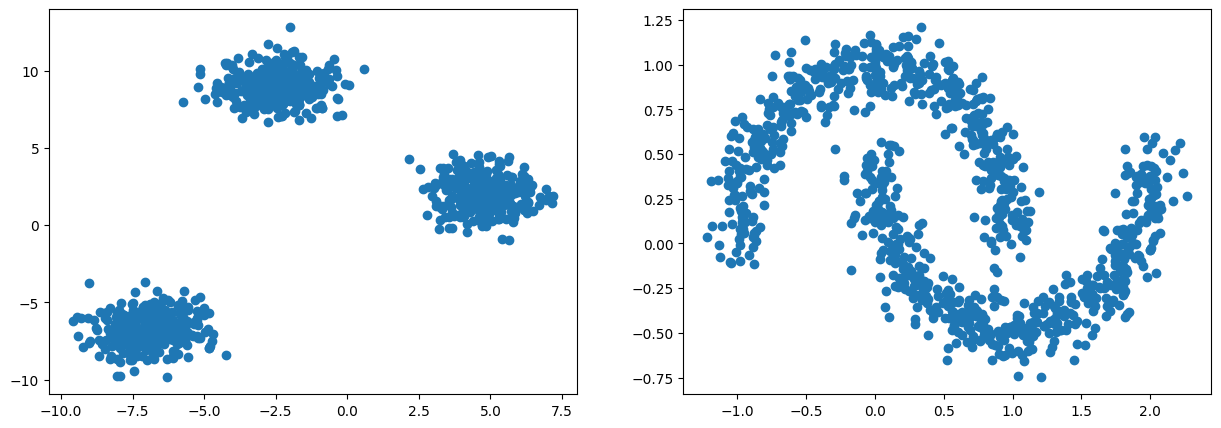

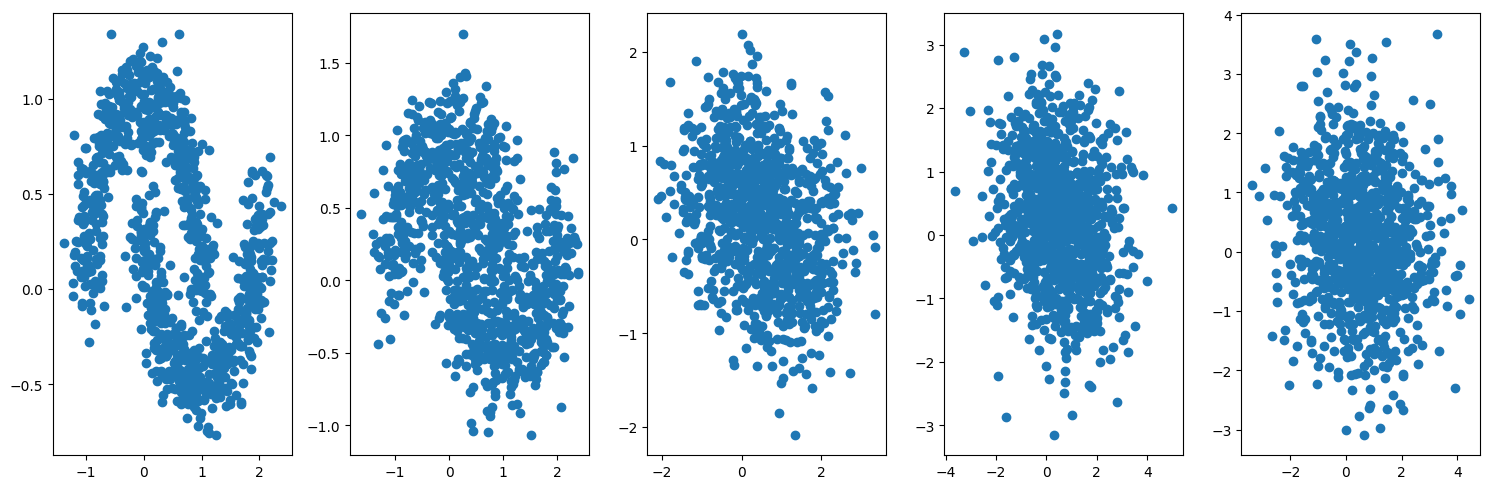

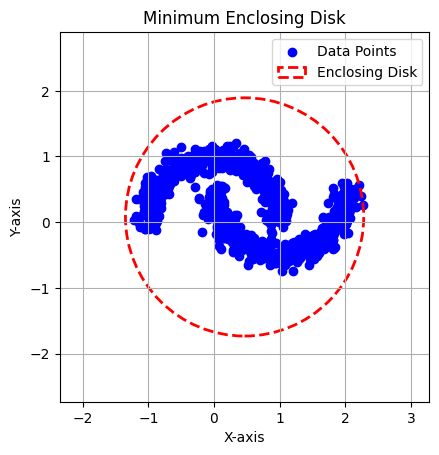

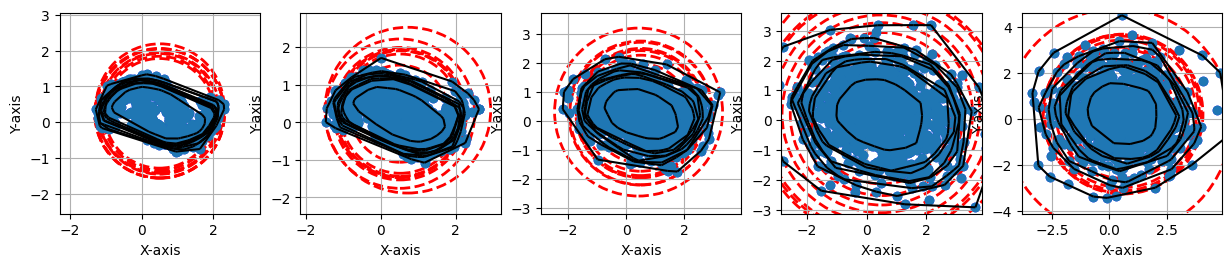

Center of data enclosing disk: [0.55099884 0.2447034 ]
Radius of data enclosing disk: 3.3700804439369465


In [5]:
    # Data Generation Mechanism:
    n_samples = 1000  # Number of samples
    n_dimensions = 2  # Number of dimensions

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    # Generate data of type 'blobs'
    data_blobs = data_generation_mechanism(n_samples, n_dimensions, type='blobs')
    ax[0].plot(data_blobs[:, 0], data_blobs[:, 1], 'o', label='blobs')

    # Generate data of type 'two_moons'
    data_moons = data_generation_mechanism(n_samples, n_dimensions, type='two_moons', add_noise=False)
    ax[1].plot(data_moons[:, 0], data_moons[:, 1], 'o', label='two_moons')
    plt.show()

    # Generating mechanism + additional noise
    noise_levels = [0.1, 0.2, 0.5, 0.9, 1.0]
    fig, axs = plt.subplots(1, len(noise_levels), figsize=(15, 5))
    for noise_level, ax in zip(noise_levels, axs):
        data_moons_noise = data_generation_mechanism(n_samples, n_dimensions, type='two_moons', add_noise=True, nose_level=noise_level)
        ax.plot(data_moons_noise[:, 0], data_moons_noise[:, 1], 'o', label=f'two_moons (noise={noise_level})')
    plt.tight_layout()
    plt.show()

    one_class_model, hull_points = data_enclosing_non_convex(data_moons,
                                                             reject_percentage=0.0, nu=0.1,
                                                             kernel='rbf', gamma='scale')

    # Find data-enclosing set (convex hull, sphere) for the data
    center, radius, hull = data_enclosing_ball(data_moons.tolist(), reject_percentage=0)
    plot_disk(center, radius, data_moons)

    reject_percentages = [0, 2, 4, 8, 10, 15, 20, 50]
    fig, axs = plt.subplots(1, len(noise_levels), figsize=(15, 5))

    for noise_level, ax in zip(noise_levels, axs):
        data_moons_noise = data_generation_mechanism(n_samples, n_dimensions,
                                                     type='two_moons',
                                                     add_noise=True,
                                                     nose_level=noise_level)

        for i_r, reject_percentage in enumerate(reject_percentages):
            center, radius, hull = data_enclosing_ball(data_moons_noise.tolist(), reject_percentage=reject_percentage)
            if i_r == 0:
                plot_disk(center, radius, data_moons_noise, ax=ax, show=False)
                convex_hull_plot_2d(hull, ax=ax)
            else:
                line_segments = [hull.points[simplex] for simplex in hull.simplices]
                ax.add_collection(LineCollection(line_segments,
                                                 colors='k',
                                                 linestyle='solid'))
                plot_disk(center, radius, None, ax=ax, show=False)
    plt.show()



    print("Center of data enclosing disk:", center)
    print("Radius of data enclosing disk:", radius)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
from scipy.spatial import ConvexHull
from matplotlib.collections import LineCollection

<ipython-input-16-c2cc9f62bdbf>:42: UserWarning: The following kwargs were not used by contour: 'label'
  ax[1,1].contour(X, Y, gmm_density, levels=10, colors='blue', linestyles='solid', label='GMM Iso-Curves')
<ipython-input-16-c2cc9f62bdbf>:43: UserWarning: The following kwargs were not used by contour: 'label'
  ax[1,2].contour(X, Y, kde_density, levels=10, colors='red', linestyles='dashed', label='KDE Iso-Curves')


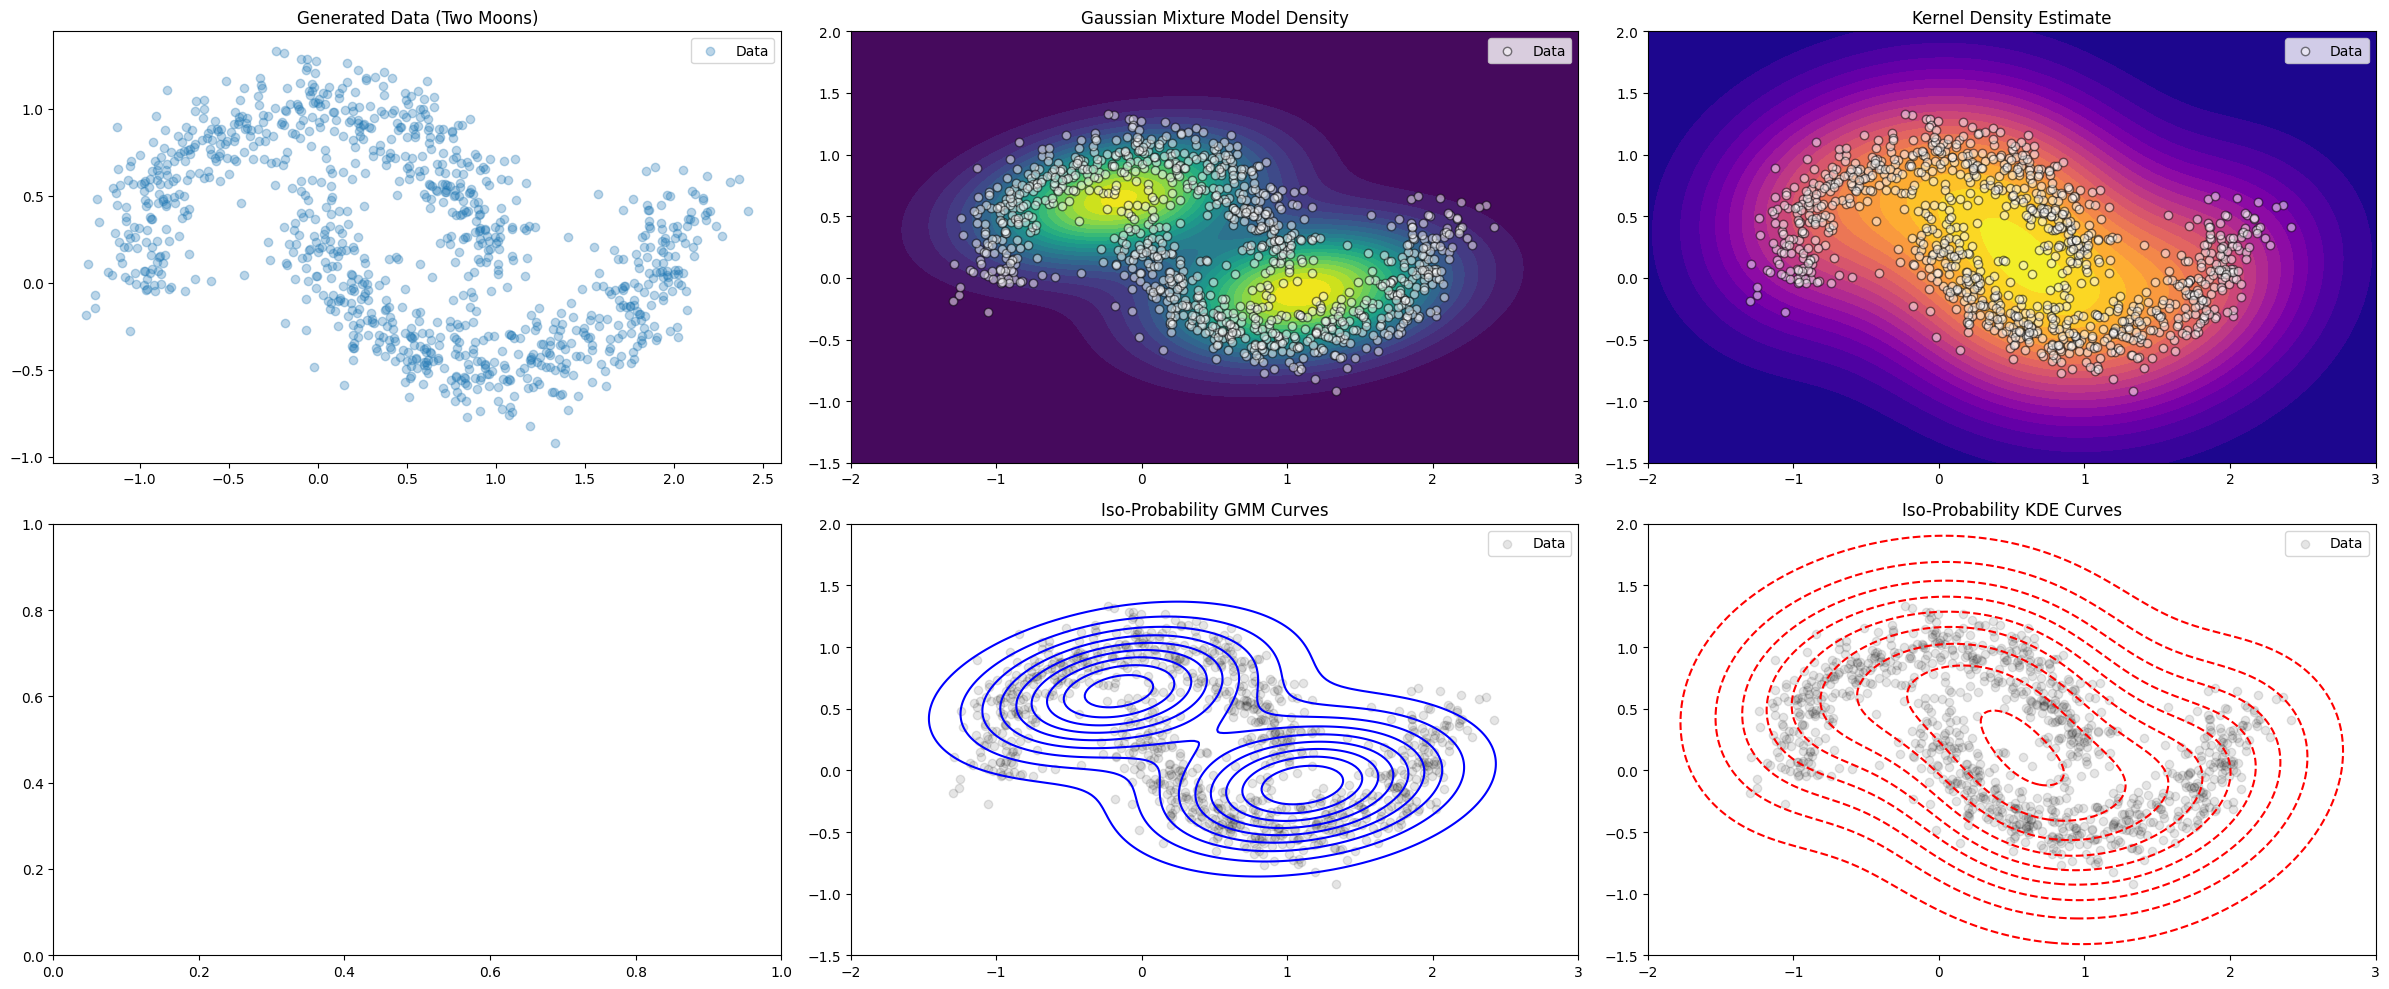

In [16]:
data_moons = data_generation_mechanism(n_samples, n_dimensions, type='two_moons', add_noise=True, nose_level=.1)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(data_moons)

# Fit a KDE model
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data_moons)

# Create a mesh grid for density visualization
x = np.linspace(-2, 3, 200)
y = np.linspace(-1.5, 2, 200)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Evaluate densities
gmm_density = np.exp(gmm.score_samples(grid_points)).reshape(X.shape)
kde_density = np.exp(kde.score_samples(grid_points)).reshape(X.shape)

# Visualize results
fig, ax = plt.subplots(2, 3, figsize=(24, 10))

# Raw data
ax[0,0].scatter(data_moons[:, 0], data_moons[:, 1], alpha=0.3, label="Data")
ax[0,0].set_title("Generated Data (Two Moons)")
ax[0,0].legend()

# GMM density
ax[0,1].contourf(X, Y, gmm_density, levels=20, cmap='viridis')
ax[0,1].scatter(data_moons[:, 0], data_moons[:, 1], alpha=0.5, color="white", edgecolor="k", label="Data")
ax[0,1].set_title("Gaussian Mixture Model Density")
ax[0,1].legend()

# KDE density
ax[0,2].contourf(X, Y, kde_density, levels=20, cmap='plasma')
ax[0,2].scatter(data_moons[:, 0], data_moons[:, 1], alpha=0.5, color="white", edgecolor="k", label="Data")
ax[0,2].set_title("Kernel Density Estimate")
ax[0,2].legend()

# Iso-probability density curves
ax[1,1].contour(X, Y, gmm_density, levels=10, colors='blue', linestyles='solid', label='GMM Iso-Curves')
ax[1,2].contour(X, Y, kde_density, levels=10, colors='red', linestyles='dashed', label='KDE Iso-Curves')
ax[1,1].scatter(data_moons[:, 0], data_moons[:, 1], alpha=0.1, color="black", label="Data")
ax[1,2].scatter(data_moons[:, 0], data_moons[:, 1], alpha=0.1, color="black", label="Data")
ax[1,1].set_title("Iso-Probability GMM Curves")
ax[1,2].set_title("Iso-Probability KDE Curves")
ax[1,2].legend()
ax[1,1].legend()

plt.tight_layout()
plt.show()